In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from keras import metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
df = pd.read_csv("/home/primesh/Downloads/air-quality-madrid/csvs_per_year/csvs_per_year/madrid_2001.csv")
df2 = df[["CO"]]
# df2.date = pd.to_datetime(df2.date)

In [3]:
#train test split
num_data = len(df2)
train_split = 0.9
num_train = int(train_split * num_data)
num_test = num_data - num_train
train = df2[0:num_train]
test = df2[num_train:]
print(train)
print(test)

          CO
0       0.37
1       0.34
2       0.28
3       0.47
4       0.39
...      ...
196079  0.57
196080  0.65
196081  0.41
196082  0.97
196083  0.52

[196084 rows x 1 columns]
          CO
196084  0.64
196085  0.21
196086  0.38
196087  0.57
196088  0.75
...      ...
217867  1.81
217868  0.69
217869  1.09
217870  1.01
217871  1.62

[21788 rows x 1 columns]


In [4]:
#scaling data
sc = MinMaxScaler(feature_range = (0, 1))
train_scaled = sc.fit_transform(train)
# df3=train_scaled.window(10,1)

In [9]:
# Creating a data structure with 10 timesteps and 1 output
X_train = []
y_train = []

window_size = 10 #window size = 10
for i in range(10,1000):
    X_train.append(train_scaled[i-window_size:i, 0]) 
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print (X_train)
print (y_train)

[[0.02050998 0.01884701 0.01552106 ... 0.03713969 0.02272727 0.0094235 ]
 [0.01884701 0.01552106 0.02605321 ... 0.02272727 0.0094235  0.0210643 ]
 [0.01552106 0.02605321 0.02161862 ... 0.0094235  0.0210643  0.0094235 ]
 ...
 [0.01773836 0.02328159 0.04711752 ... 0.04933481 0.00498891 0.02272727]
 [0.02328159 0.04711752 0.04490022 ... 0.00498891 0.02272727 0.01940133]
 [0.04711752 0.04490022 0.01884701 ... 0.02272727 0.01940133 0.00609756]]
[0.0210643  0.0094235  0.00997783 0.01330377 0.01385809 0.0094235
 0.01441242 0.01607539 0.01829268 0.04490022 0.00997783 0.02383592
 0.01108647 0.01884701 0.02328159 0.00332594 0.01496674 0.01829268
 0.01662971 0.02328159 0.01274945 0.03215077 0.01662971 0.00388027
 0.01552106 0.00609756 0.01829268 0.00997783 0.01274945 0.00776053
 0.01108647 0.01274945 0.01552106 0.04933481 0.01108647 0.02827051
 0.01053215 0.01607539 0.01773836 0.00110865 0.00997783 0.01496674
 0.01552106 0.02383592 0.01108647 0.01884701 0.01496674 0.00277162
 0.01496674 0.0066518

In [56]:
# linear regression - DNN with single layer

print (X_train.shape)
l0 = tf.keras.layers.Dense(1, input_shape=[window_size]) #input shape = 10
model_lr = tf.keras.models.Sequential([l0]) # model_lr --> linear regression model
 

model_lr.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-3, momentum=0.9))
history = model_lr.fit(X_train,y_train,epochs=100,verbose=2)

print("Layer weights {}".format(l0.get_weights()))

(990, 10)
Epoch 1/100
 - 0s - loss: 0.0010
Epoch 2/100
 - 0s - loss: 7.4634e-04
Epoch 3/100
 - 0s - loss: 6.7061e-04
Epoch 4/100
 - 0s - loss: 6.5391e-04
Epoch 5/100
 - 0s - loss: 6.5070e-04
Epoch 6/100
 - 0s - loss: 6.4954e-04
Epoch 7/100
 - 0s - loss: 6.4919e-04
Epoch 8/100
 - 0s - loss: 6.4915e-04
Epoch 9/100
 - 0s - loss: 6.4890e-04
Epoch 10/100
 - 0s - loss: 6.4870e-04
Epoch 11/100
 - 0s - loss: 6.4817e-04
Epoch 12/100
 - 0s - loss: 6.4801e-04
Epoch 13/100
 - 0s - loss: 6.4771e-04
Epoch 14/100
 - 0s - loss: 6.4764e-04
Epoch 15/100
 - 0s - loss: 6.4746e-04
Epoch 16/100
 - 0s - loss: 6.4699e-04
Epoch 17/100
 - 0s - loss: 6.4679e-04
Epoch 18/100
 - 0s - loss: 6.4651e-04
Epoch 19/100
 - 0s - loss: 6.4646e-04
Epoch 20/100
 - 0s - loss: 6.4600e-04
Epoch 21/100
 - 0s - loss: 6.4615e-04
Epoch 22/100
 - 0s - loss: 6.4531e-04
Epoch 23/100
 - 0s - loss: 6.4554e-04
Epoch 24/100
 - 0s - loss: 6.4525e-04
Epoch 25/100
 - 0s - loss: 6.4463e-04
Epoch 26/100
 - 0s - loss: 6.4446e-04
Epoch 27/100
 -

[1e-08, 0.001, 0, 0.002]

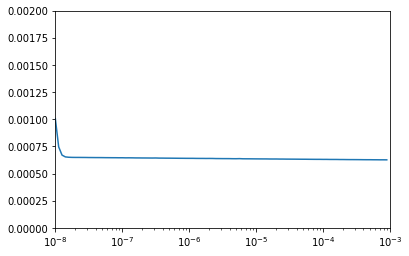

In [57]:
lrs = 1e-8 * (10 ** (np.arange(100) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 0.002])

In [73]:
# predicting a single value

# changing the shape of test set for predictions
test = np.array(test) #converting into a numpy array
test_reshaped = np.reshape(test, (test.shape[0])) # reshaping into one dimension --> This dimension represents number of rows
test_reshaped = test_reshaped[:100]
# predincting the next value
print (np.array(test[11])) # real value of the forecasted value
model_lr.predict(test_reshaped[0:10][np.newaxis]) #forecasting 11th value from previous 10 inputs


[0.57999998]


array([[0.13705991]], dtype=float32)

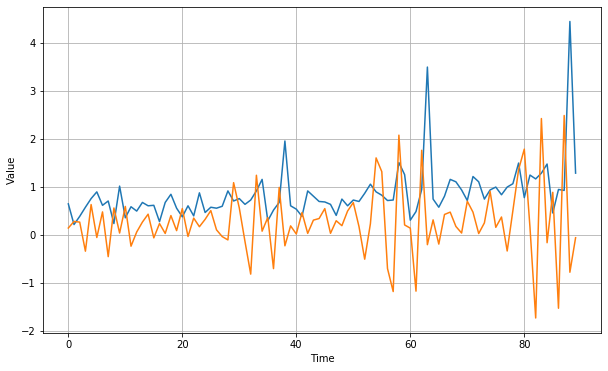

In [76]:
# predicting the test set

forecast = []
for time in range (len(test_reshaped)-window_size): # taking only 10% from test set
    forecast.append(model_lr.predict(test_reshaped[time:time+window_size][np.newaxis])) 
    
results_lr = np.array(forecast)[:,0,0] # converting forecast into a numpy array for plotting

# plotting the graph
plt.figure(figsize=(10, 6))

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

time_valid = np.arange(len(test_reshaped)-window_size, dtype = "float32") # creating the y axis with the same length as x axis
plot_series(time_valid, test[:len(test_reshaped)-window_size])
plot_series(time_valid,results_lr)



In [77]:
# calculating the error of model_lr

# print(tf.keras.metrics.mean_absolute_error(test[:len(test_reshaped)-window_size], results))
print (mean_squared_error(test[:len(test_reshaped)-window_size], results_lr))

1.2317169822552216


In [78]:
# DNN 

model_DNN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

# learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

optimizer = tf.keras.optimizers.SGD(lr=1e-3, momentum=0.9)
model_DNN.compile(loss="mse", optimizer=optimizer)
history = model_DNN.fit(X_train,y_train, epochs=150, callbacks=[lr_schedule], verbose=2)

Epoch 1/150
 - 0s - loss: 0.0021
Epoch 2/150
 - 0s - loss: 0.0021
Epoch 3/150
 - 0s - loss: 0.0021
Epoch 4/150
 - 0s - loss: 0.0021
Epoch 5/150
 - 0s - loss: 0.0021
Epoch 6/150
 - 0s - loss: 0.0021
Epoch 7/150
 - 0s - loss: 0.0021
Epoch 8/150
 - 0s - loss: 0.0021
Epoch 9/150
 - 0s - loss: 0.0021
Epoch 10/150
 - 0s - loss: 0.0021
Epoch 11/150
 - 0s - loss: 0.0021
Epoch 12/150
 - 0s - loss: 0.0021
Epoch 13/150
 - 0s - loss: 0.0021
Epoch 14/150
 - 0s - loss: 0.0021
Epoch 15/150
 - 0s - loss: 0.0021
Epoch 16/150
 - 0s - loss: 0.0021
Epoch 17/150
 - 0s - loss: 0.0021
Epoch 18/150
 - 0s - loss: 0.0021
Epoch 19/150
 - 0s - loss: 0.0021
Epoch 20/150
 - 0s - loss: 0.0021
Epoch 21/150
 - 0s - loss: 0.0021
Epoch 22/150
 - 0s - loss: 0.0021
Epoch 23/150
 - 0s - loss: 0.0021
Epoch 24/150
 - 0s - loss: 0.0021
Epoch 25/150
 - 0s - loss: 0.0021
Epoch 26/150
 - 0s - loss: 0.0021
Epoch 27/150
 - 0s - loss: 0.0021
Epoch 28/150
 - 0s - loss: 0.0021
Epoch 29/150
 - 0s - loss: 0.0021
Epoch 30/150
 - 0s - lo

[1e-08, 0.5, 0, 0.004]

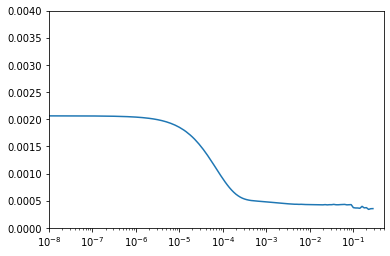

In [79]:
# learning rate per epoch vs loss per epoch

# select the optimum learning rate from above plot
# then plot loss vs epoch 

lrs = 1e-8 * (10 ** (np.arange(150) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-8, 0.5, 0, 0.004])

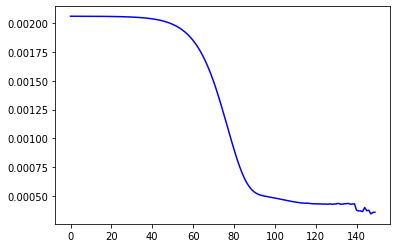

In [80]:
# epochs vs loss

loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.show()

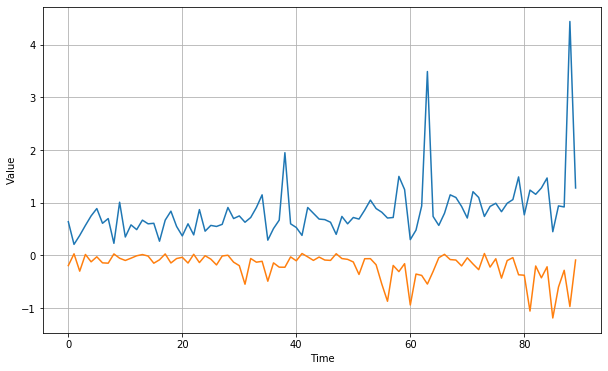

In [81]:
# predicting the test set

forecast = []
for time in range (len(test_reshaped)-window_size): # taking only 10% from test set
    forecast.append(model_DNN.predict(test_reshaped[time:time+window_size][np.newaxis])) 
    
results_DNN = np.array(forecast)[:,0,0] # converting forecast into a numpy array for plotting

# plotting the graph
plt.figure(figsize=(10, 6))

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

time_valid = np.arange(len(test_reshaped)-window_size, dtype = "float32") # creating the y axis with the same length as x axis
plot_series(time_valid, test[:len(test_reshaped)-window_size])
plot_series(time_valid,results_DNN)


In [82]:
# calculating the error of model_DNN

# print(tf.keras.metrics.mean_absolute_error(test[:len(test_reshaped)-window_size], results))
print (mean_squared_error(test[:len(test_reshaped)-window_size], results_DNN))

1.5615514035484792


In [1]:
# simple RNN

model_sRNN = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(40),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)

model_sRNN.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history = model_sRNN.fit(X_train,y_train, epochs=100, callbacks=[lr_schedule])

NameError: name 'tf' is not defined